# Linear Regression

In [1]:
#import modules
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

### Linear Regression with One Variable

In [2]:
ex1_data=np.loadtxt('data/ex1data1.txt',delimiter=',')

X = np.c_[np.ones(ex1_data.shape[0]),ex1_data[:,0]]
y = np.c_[ex1_data[:,1]]

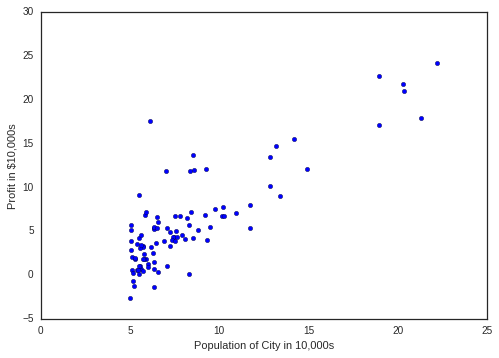

In [3]:
plt.scatter(X[:,1],y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

##### Gradient Descent

In [4]:
def computeCost(X,y,theta):
    #J(θ) =1/2m * sum(hθ(x(i)) − y(i))^2
    #hθ(x(i)) = θ^T x
    
    m=y.size
    h=X.dot(theta)
    
    J=(1/(2.*m))*np.sum(np.square(h-y))
    
    return J

In [5]:
computeCost(X,y,[[0],[0]])

32.072733877455676

In [6]:
def gradientDescent(X,y,theta=[[0],[0]],alpha=0.01,iterations=1500):
    
    m=y.size
    J_history = np.zeros(iterations)
    
    for iter in np.arange(iterations):
        h=X.dot(theta)
        theta-=alpha*(1./m)*(X.T.dot(h-y))
        J_history[iter]=computeCost(X,y,theta)
        
    return (theta,J_history)

In [7]:
theta, J_Cost=gradientDescent(X,y)
print('theta: ',theta.ravel())


('theta: ', array([-3.63029144,  1.16636235]))


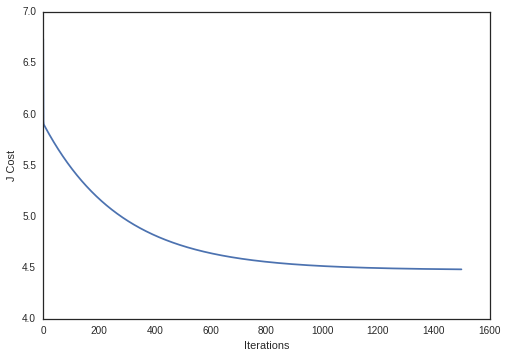

In [8]:
plt.plot(J_Cost)
plt.ylabel('J Cost')
plt.xlabel('Iterations');

##### Visualization

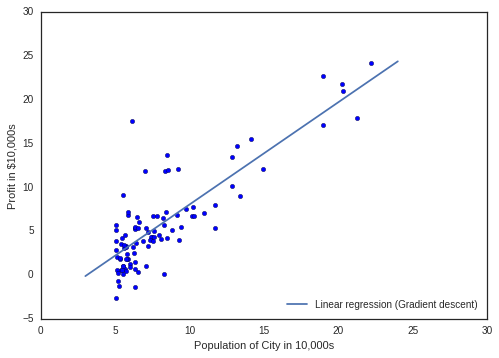

In [9]:
xx = np.arange(3,25)
yy = theta[0]+theta[1]*xx

# Plot gradient descent
plt.scatter(X[:,1], y)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

In [10]:
# Predict profit for a city with population of 35000 and 70000
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[ 4519.7678677]
[ 45342.45012945]


### Linear Regression with Multiple Variables

In [11]:
ex2_data=np.loadtxt('data/ex1data2.txt',delimiter=',')

In [12]:
X = np.c_[ex2_data[:,:2]]
y = np.c_[ex2_data[:,2]]

##### Normalization

In [13]:
def normalization(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm=np.subtract(X, mean)/std
    return X_norm,mean,std

In [14]:
X,mean,std=normalization(X)

In [15]:
X=np.c_[np.ones(ex2_data.shape[0]),X[:,:2]]

##### Gradient Descent

In [16]:
def computeCost_multi(X,y,theta):
    
    m=y.size
    J=(1/(2.*m))*(X.dot(theta)-y).T.dot(X.dot(theta)-y)
    
    return J[0][0]

In [17]:
computeCost_multi(X,y,[[0],[0],[0]])

65591548106.457443

In [18]:
def gradientDescent_multi(X,y,theta=[[0],[0],[0]],alpha=0.01,iterations=400):
    
    m=y.size
    J_history = np.zeros(iterations)
    
    for iter in np.arange(iterations):
        h=X.dot(theta)
        theta-=alpha*(1./m)*(X.T.dot(h-y))
        J_history[iter]=computeCost_multi(X,y,theta)
        
    return (theta,J_history)

In [19]:
theta, J_Cost=gradientDescent_multi(X,y)
print('theta: ',theta.ravel())

('theta: ', array([ 334302.06399328,   99411.44947359,    3267.01285407]))


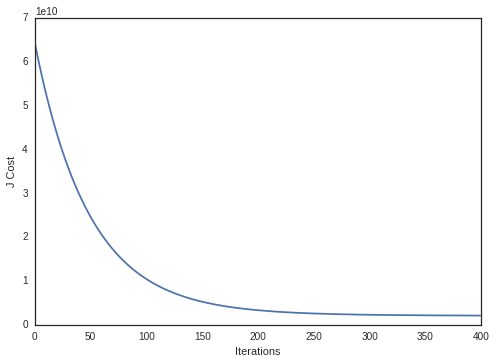

In [20]:
plt.plot(J_Cost)
plt.ylabel('J Cost')
plt.xlabel('Iterations');

In [21]:
# predict the price of a house with 1650 square feet and 3 bedrooms
item_norm = (np.array([1650,3])-mean)/std
item_norm=np.array([1,item_norm[0],item_norm[1]])
print theta.T.dot(item_norm)

[ 289221.54737122]


##### Normal Equations

In [22]:
ex2_data=np.loadtxt('data/ex1data2.txt',delimiter=',')

In [23]:
X = np.c_[np.ones(ex2_data.shape[0]),ex2_data[:,:2]]
y = np.c_[ex2_data[:,2]]

In [24]:
from numpy.linalg import inv

def normal_eq(X,y):
    
    theta=(inv(X.T.dot(X))).dot(X.T.dot(y))
    
    return theta

In [25]:
theta=normal_eq(X,y)
print('theta: ',theta.ravel())

('theta: ', array([ 89597.9095428 ,    139.21067402,  -8738.01911233]))


In [26]:
# predict the price of a house with 1650 square feet and 3 bedrooms
item=np.array([1,1650,3])
print theta.T.dot(item)

[ 293081.4643349]


<b>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>